# Import Dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Importing the Dataset

In [14]:
house_price_dataset = pd.read_csv('BostonHousing.csv')

In [15]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset
house_price_dataset = fetch_openml(name="boston", version=1, as_frame=True)

# Convert to DataFrame
house_price_dataFrame = house_price_dataset.data

# Add the target (price) column
house_price_dataFrame['PRICE'] = house_price_dataset.target

# Display first 5 rows
print(house_price_dataFrame.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [24]:
house_price_dataFrame.shape

(506, 14)

In [17]:
house_price_dataset.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [25]:
#Check for Missing values
house_price_dataFrame.isnull().sum()  #No missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [26]:
# Statistical measures of the dataset
house_price_dataFrame.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the Correlation between various feature in Dataset

1. Positive Correlation
2. Negatuve Correlation

In [27]:
correlation = house_price_dataFrame.corr()

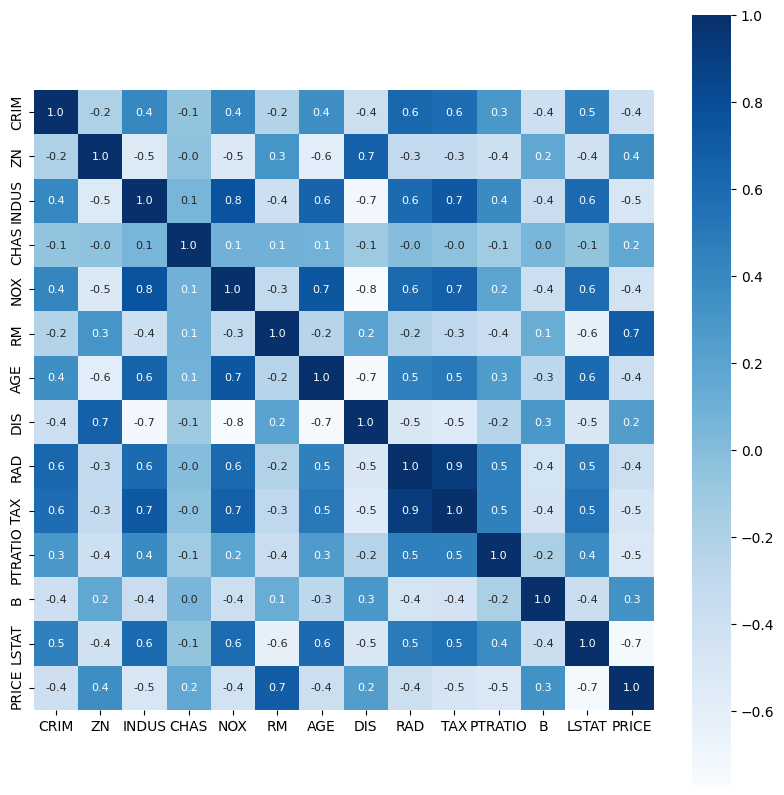

In [31]:
#Constructing the Heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

# Splitting the Data and Traget

In [33]:
X = house_price_dataFrame.drop(columns='PRICE', axis=1)
Y = house_price_dataFrame['PRICE']

In [34]:
print(X)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [35]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


# Splitting into Traing and Test Data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# Model Training --> XGBoost Regressor

In [ ]:
# Loading the model
model = XGBRegressor(enable_categorical=True)

In [46]:
# training the model with x_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction on Training Data

In [45]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [49]:
print(training_data_prediction)

[23.12537   20.993305  20.101828  34.698845  13.90048   13.498627
 21.999454  15.204494  10.898279  22.683517  13.804576   5.5999727
 29.800287  49.997086  34.899097  20.602865  23.385353  19.18291
 32.698814  19.600945  26.994783   8.395777  46.001015  21.715147
 27.077194  19.379717  19.300058  24.795628  22.610891  31.724024
 18.511816   8.700756  17.401417  23.702253  13.299225  10.512143
 12.678252  24.998468  19.690723  14.897103  24.204836  25.00939
 14.899758  16.997213  15.595185  12.692106  24.50731   15.006159
 50.001972  17.517784  21.202095  31.99562   15.607423  22.901945
 19.320164  18.720781  23.302368  37.205223  30.100294  33.103645
 21.010303  49.99931   13.399545   5.0076556 16.498867   8.398998
 28.66987   19.494442  20.597595  45.400585  39.803585  33.40453
 19.807894  33.4003    25.29777   49.998013  12.523513  17.439049
 18.603155  22.59679   50.004223  23.796879  23.307257  23.081825
 41.711502  16.112608  31.59987   36.09465    7.0044384 20.387278
 20.00197   

In [53]:
# R squared error --> Finds the variance btw two values
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [54]:
print("R squared error:",score_1)
print("Mean Absolute error:",score_2) #The less the value is the good the model performs

R squared error: 0.9999985261877631
Mean Absolute error: 0.007722842103183917


# Visualizing the actual Prices on Predicted Prices

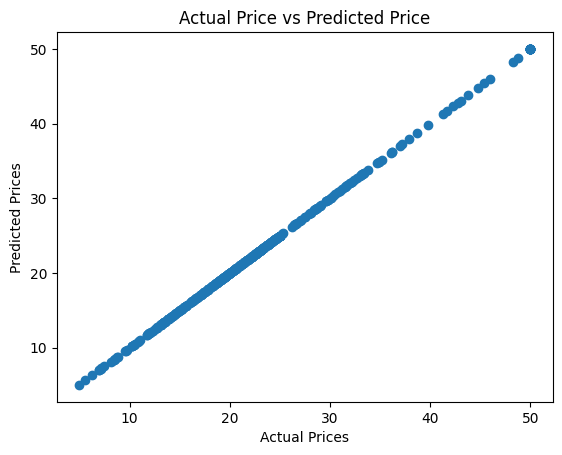

In [60]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on Test Data

In [55]:
# accuracy for prediction on training data
test_data_prediction = model.predict(X_test)

In [56]:
print(test_data_prediction)

[22.022594  20.948765  31.408155  29.2183    10.02495   13.669058
 22.884296  27.572289  22.358644  19.901     25.63268   23.358326
 19.691706  19.761372  12.680286  22.791176  18.946533  11.062307
  7.656945  15.696355  22.525549  20.21276   38.807915  18.646374
 14.025025  19.16747   42.434734  32.216667  33.46108   19.733753
 17.44116   20.312515  29.55675   23.31036   11.966554  17.863432
  9.8589325 21.11539   22.520487  21.448454  27.154106  11.775265
 29.491241   8.176432  20.518913  13.619074  36.282063  15.939533
 32.99531   13.91037   30.552578  29.800184   6.124645  35.283604
 24.4272    19.409668  19.412144  19.996645  16.590918  23.299543
 21.177572  21.971777  18.594683  29.26019   34.0269    25.69799
 49.811947  25.593609   9.383302  22.506395  16.218227   9.157478
 14.604939  16.939453  27.072216  24.460194  21.880316  22.545324
 18.772285  25.246567  34.99849   18.412445  20.315779  31.613583
 48.466385  38.671616  18.589235  26.07625   27.689474  19.644287
 20.153204 

In [57]:
# R squared error --> Finds the variance btw two values
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [58]:
print("R squared error:",score_1)
print("Mean Absolute error:",score_2) #The less the value is the good the model performs

R squared error: 0.9110784518505095
Mean Absolute error: 2.075374621970981
